In [22]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [87]:
product_data = pd.read_csv('ProductsData.csv', encoding='latin1')
product_data

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
0,"""chambre a coucher ""","""40008817""","""Meubles et décoration """,1 800,"""private""","""Grand Casablanca""","""Casablanca"""
1,"""Comte free fire""","""40008816""","""Jeux vidéo et consoles """,,"""private""","""Grand Casablanca""","""Casablanca"""
2,"""Iphone 6 plus""","""40008815""","""Téléphones """,,"""private""","""Grand Casablanca""","""Casablanca"""
3,"""Renault ""","""40008814""","""Voitures """,,"""private""","""Chaouia-Ouardigha""","""Settat"""
4,"""PS3 SLIM 360 GB ""","""40008812""","""Jeux vidéo et consoles """,1 400,"""private""","""Rabat-Salé-Zemmour-Zaër""","""Sala Al-Jadida"""
...,...,...,...,...,...,...,...
4345,"""XN-C11""","""39234529""","""Instruments de musique """,90,"""private""","""Chaouia-Ouardigha""","""Khouribga"""
4346,"""Uno""","""39234527""","""Voitures """,20 000,"""private""","""Grand Casablanca""","""Mohammedia"""
4347,"""???? ????????? ????? ????""","""39234526""","""Matériels professionnels """,,"""pro""","""Grand Casablanca""","""Casablanca"""
4348,"""Poussette Bugaboo cameleon 3 black""","""39234524""","""Equipements pour enfant et bébé """,1 850,"""private""","""Tanger-Tétouan""","""Tanger"""


In [127]:
len(product_data['Product_name'].unique())

3138

In [3]:
product_data.describe()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
count,4350,4350,4350,3580,4350,4350,4350
unique,3407,3739,45,529,2,16,124
top,"""Renault""","""39235089""","""Voitures """,,"""private""","""Grand Casablanca""","""Casablanca"""
freq,18,3,654,451,2688,1355,1272


In [4]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4350 entries, 0 to 4349
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Product_name              4350 non-null   object
 1   Product_id                4350 non-null   object
 2   Product_Category          4350 non-null   object
 3   price                     3580 non-null   object
 4   Professional_Publication  4350 non-null   object
 5   Region_address            4350 non-null   object
 6   Local_address             4350 non-null   object
dtypes: object(7)
memory usage: 238.0+ KB


In [24]:
product_data.isnull().sum()

Product_name                  0
Product_id                    0
Product_Category              0
price                       770
Professional_Publication      0
Region_address                0
Local_address                 0
dtype: int64

In [6]:
product_data.shape


(4350, 7)

In [7]:
product_data.columns

Index(['Product_name', 'Product_id', 'Product_Category', 'price',
       'Professional_Publication', 'Region_address', 'Local_address'],
      dtype='object')

In [42]:
def normalization(x:str):
    if type(x) == str:
        x = x.replace('"','').strip()
    return x

In [43]:
normalization("chambre a coucher ")

'chambre a coucher'

In [48]:
x = '.?123'
x.find('?')

1

In [49]:
x = '.123'
x.find('?')

-1

In [80]:
def change_name(name):
    if type(name) == str:
        if name.find('?') != -1:
            return np.nan
    return name

In [71]:
change_name('???? ????????? ????? ????	')

nan

In [88]:
for col in product_data.columns:
    product_data[col] = product_data[col].apply(normalization).apply(change_name).replace(r'^\s*$', np.nan, regex=True)

product_data

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
0,chambre a coucher,40008817,Meubles et décoration,1 800,private,Grand Casablanca,Casablanca
1,Comte free fire,40008816,Jeux vidéo et consoles,NaN,private,Grand Casablanca,Casablanca
2,Iphone 6 plus,40008815,Téléphones,NaN,private,Grand Casablanca,Casablanca
3,Renault,40008814,Voitures,NaN,private,Chaouia-Ouardigha,Settat
4,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1 400,private,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida
...,...,...,...,...,...,...,...
4345,XN-C11,39234529,Instruments de musique,90,private,Chaouia-Ouardigha,Khouribga
4346,Uno,39234527,Voitures,20 000,private,Grand Casablanca,Mohammedia
4347,NaN,39234526,Matériels professionnels,NaN,pro,Grand Casablanca,Casablanca
4348,Poussette Bugaboo cameleon 3 black,39234524,Equipements pour enfant et bébé,1 850,private,Tanger-Tétouan,Tanger


In [82]:
product_data.isnull().sum()

Product_name                 380
Product_id                     0
Product_Category               0
price                       1221
Professional_Publication       0
Region_address                 0
Local_address                  0
dtype: int64

In [83]:
product_data['price']

0        1 800
1          NaN
2          NaN
3          NaN
4        1 400
         ...  
4345        90
4346    20 000
4347       NaN
4348     1 850
4349       NaN
Name: price, Length: 4350, dtype: object

In [91]:
'1 800'.replace(' ','')

'1800'

In [94]:
product_data['price'] = product_data['price'].str.replace(' ','').astype(float)
product_data['price']

0        1800.0
1           NaN
2           NaN
3           NaN
4        1400.0
         ...   
4345       90.0
4346    20000.0
4347        NaN
4348     1850.0
4349        NaN
Name: price, Length: 4350, dtype: float64

In [97]:
product_data = product_data[product_data['Product_name'].notna()]
product_data

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
0,chambre a coucher,40008817,Meubles et décoration,1800.0,private,Grand Casablanca,Casablanca
1,Comte free fire,40008816,Jeux vidéo et consoles,NaN,private,Grand Casablanca,Casablanca
2,Iphone 6 plus,40008815,Téléphones,NaN,private,Grand Casablanca,Casablanca
3,Renault,40008814,Voitures,NaN,private,Chaouia-Ouardigha,Settat
4,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1400.0,private,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida
...,...,...,...,...,...,...,...
4344,PC portable Asus,39234530,Ordinateurs portables,5000.0,private,Grand Casablanca,Casablanca
4345,XN-C11,39234529,Instruments de musique,90.0,private,Chaouia-Ouardigha,Khouribga
4346,Uno,39234527,Voitures,20000.0,private,Grand Casablanca,Mohammedia
4348,Poussette Bugaboo cameleon 3 black,39234524,Equipements pour enfant et bébé,1850.0,private,Tanger-Tétouan,Tanger


array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

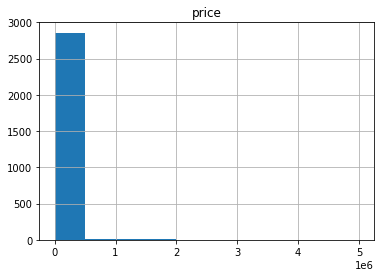

In [98]:
product_data.hist()

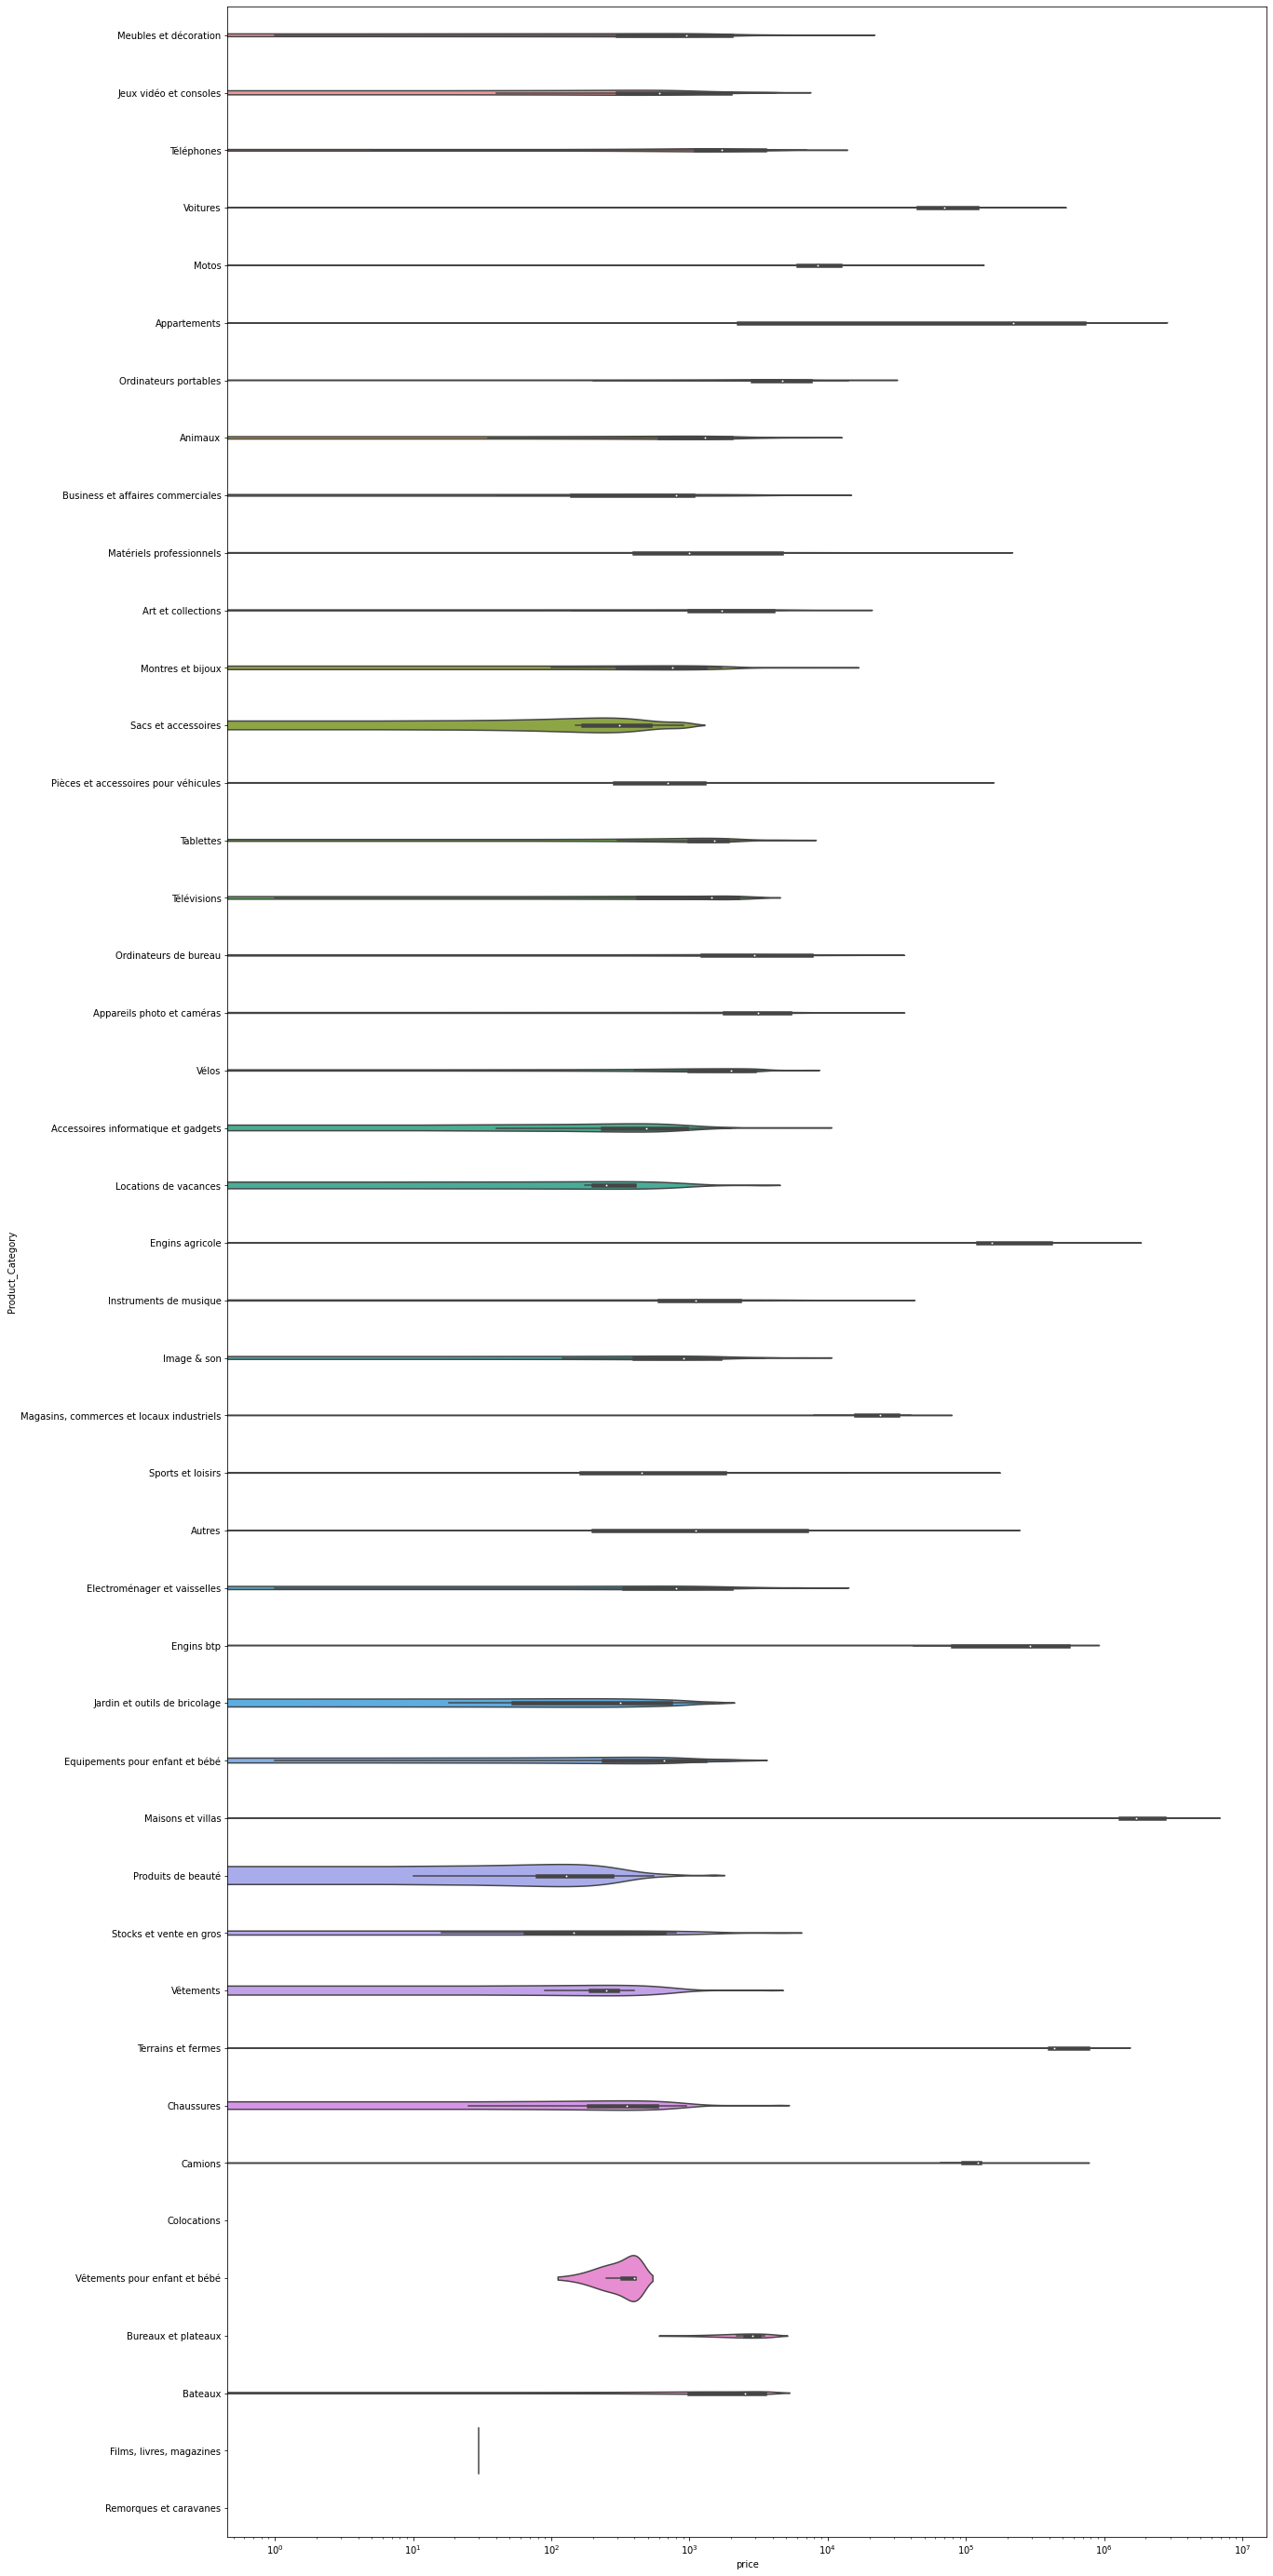

In [103]:
plt.figure(figsize=(20, 50))
sbn.violinplot(product_data['price'], product_data['Product_Category'])
plt.xscale('log')

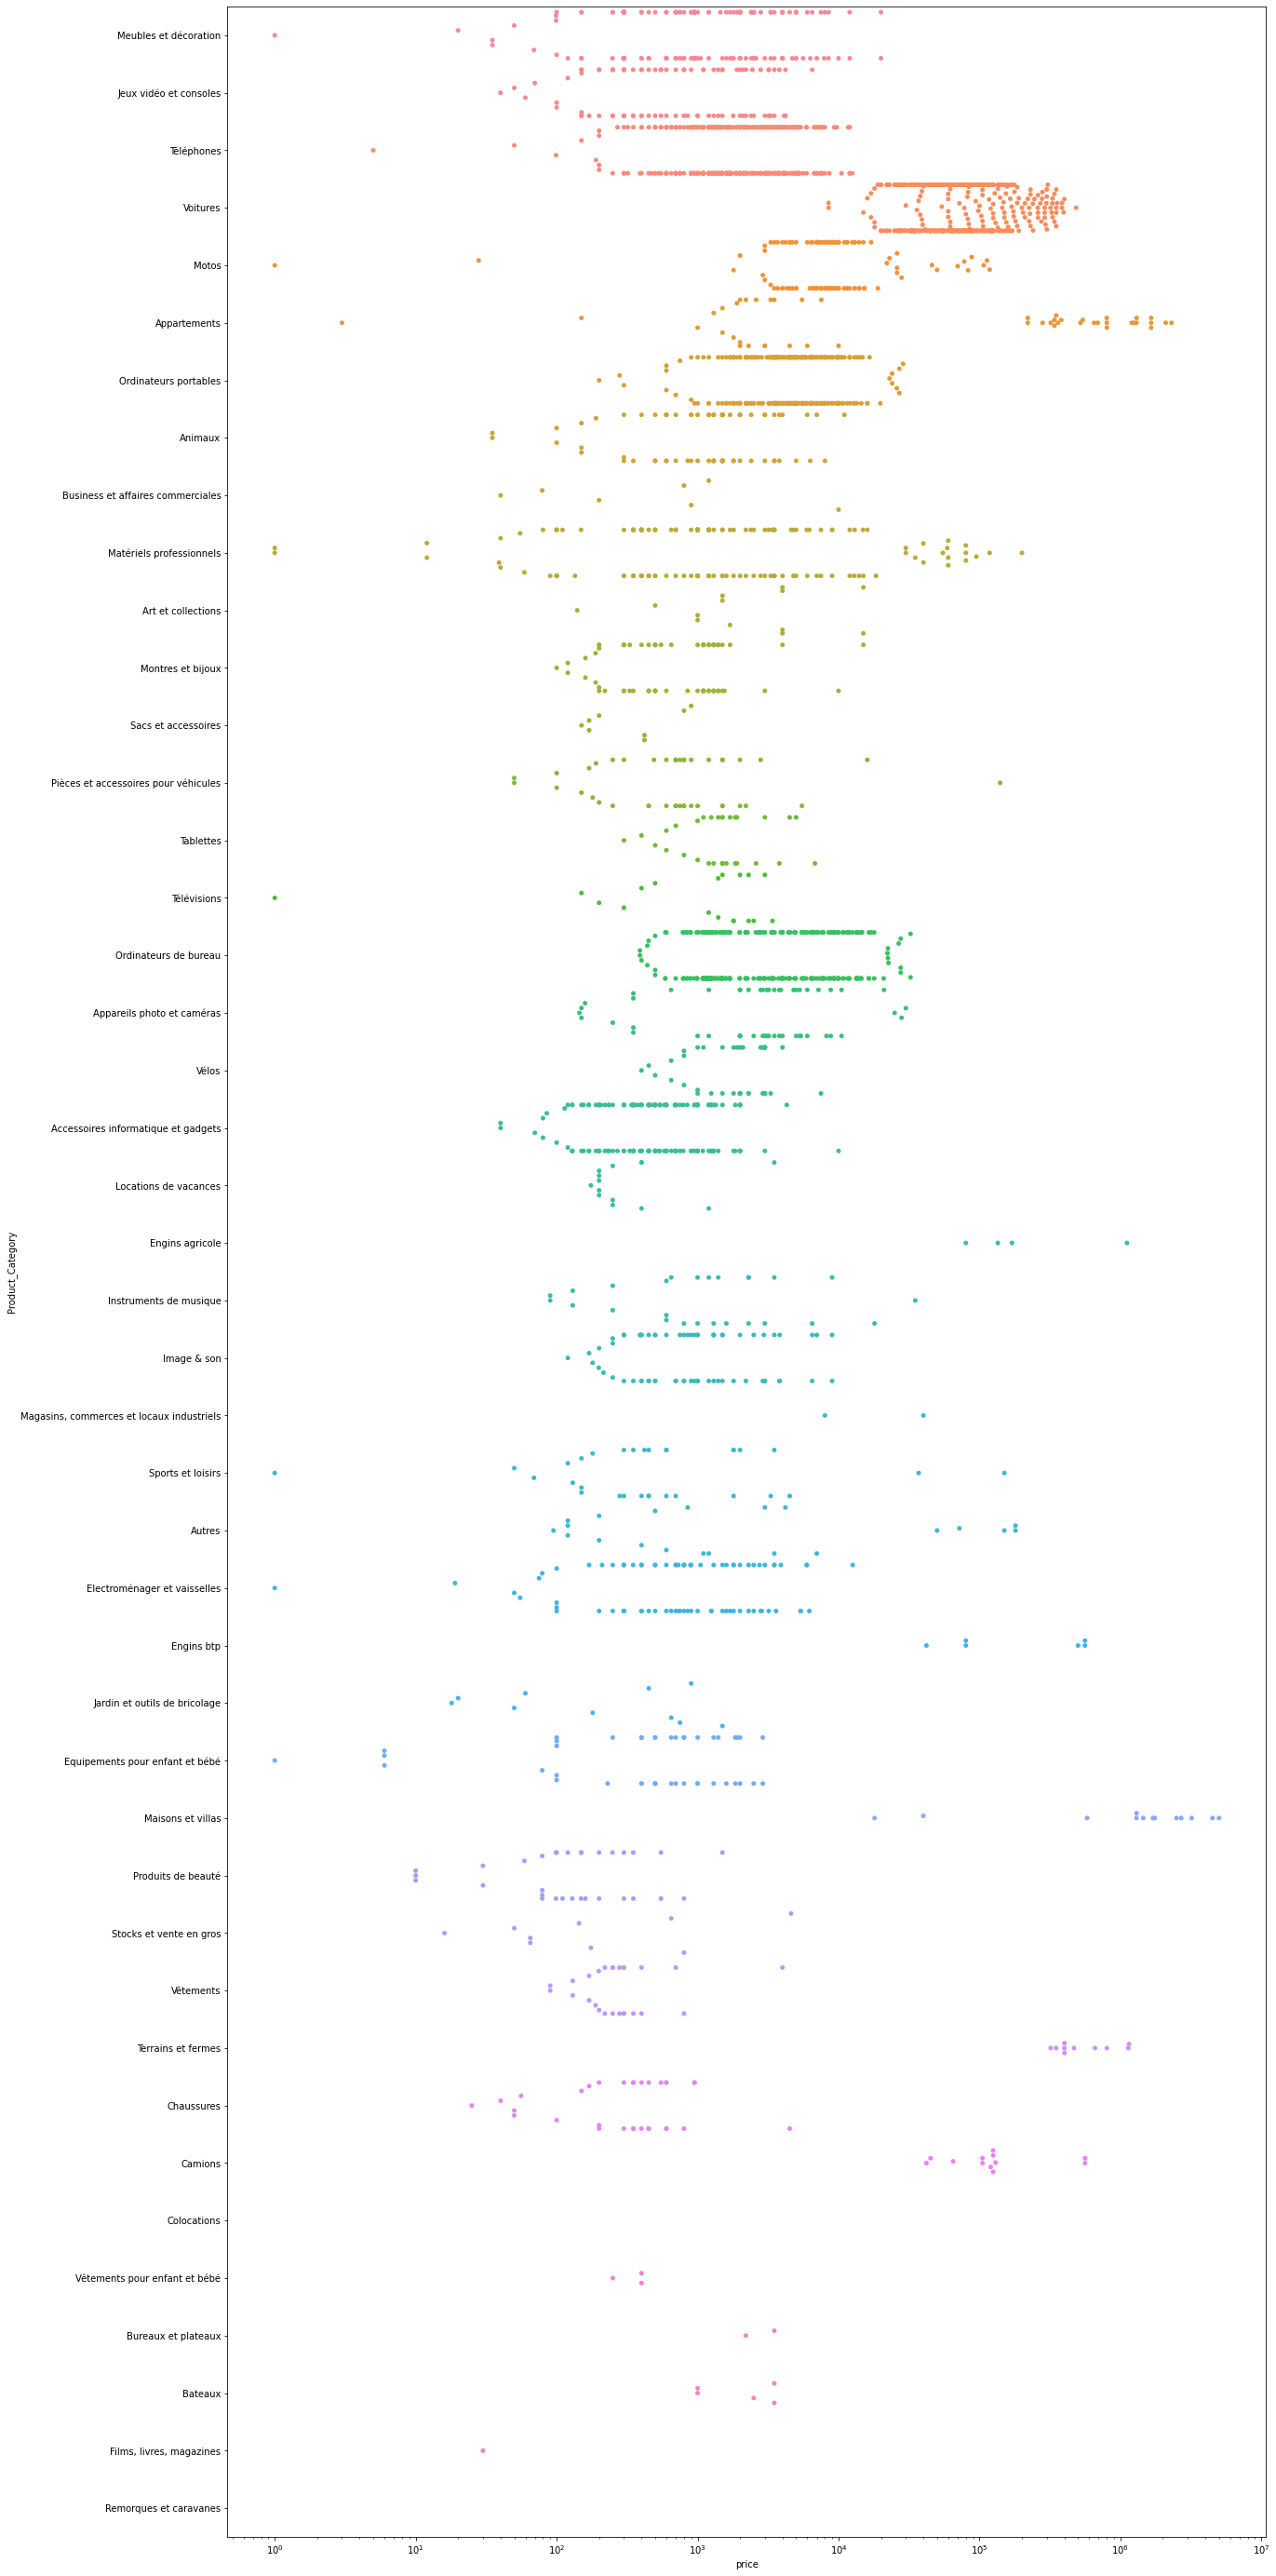

In [104]:
plt.figure(figsize=(20, 50))
sbn.swarmplot(product_data['price'], product_data['Product_Category'])
plt.xscale('log')

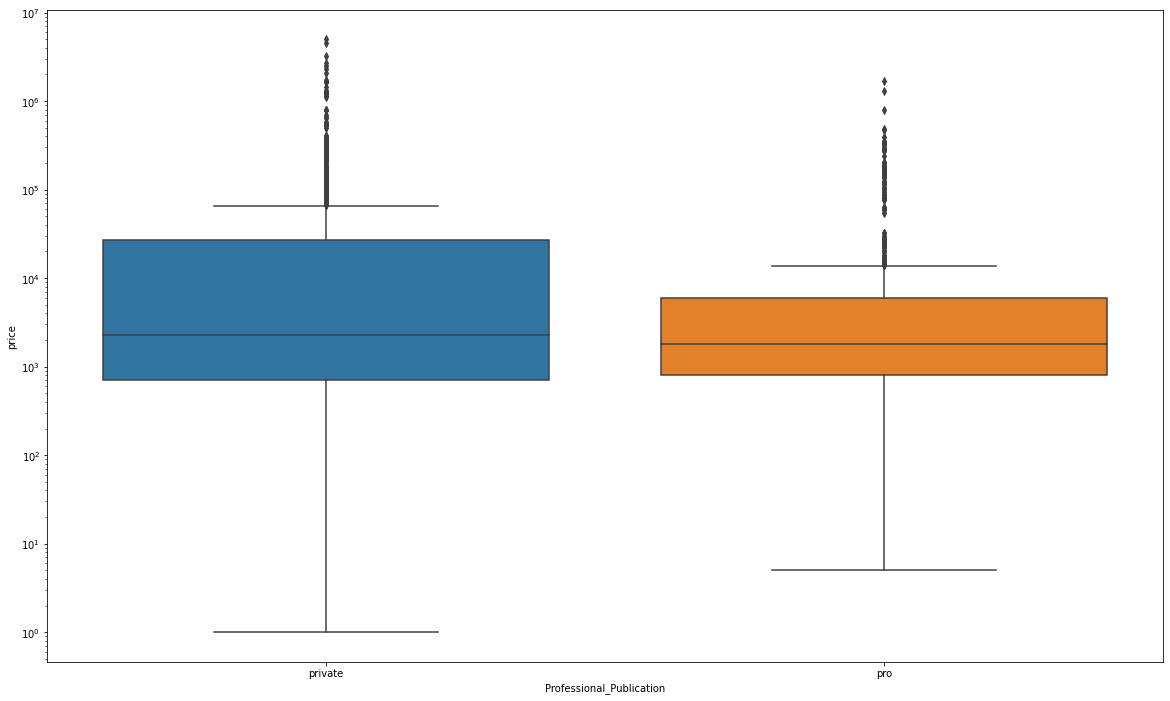

In [106]:
plt.figure(figsize=(20, 12))
sbn.boxplot(product_data['Professional_Publication'], product_data['price'])
plt.yscale('log')

In [108]:
product_data['Product_Category'].value_counts()

Voitures                                     624
Téléphones                                   409
Matériels professionnels                     407
Ordinateurs de bureau                        336
Ordinateurs portables                        271
Meubles et décoration                        241
Accessoires informatique et gadgets          198
Motos                                        145
Appareils photo et caméras                   138
Jeux vidéo et consoles                       114
Animaux                                      113
Pièces et accessoires pour véhicules         104
Electroménager et vaisselles                  90
Image & son                                   85
Appartements                                  79
Montres et bijoux                             76
Equipements pour enfant et bébé               49
Vélos                                         43
Tablettes                                     36
Sports et loisirs                             36
Vêtements           

<AxesSubplot:xlabel='Product_Category', ylabel='count'>

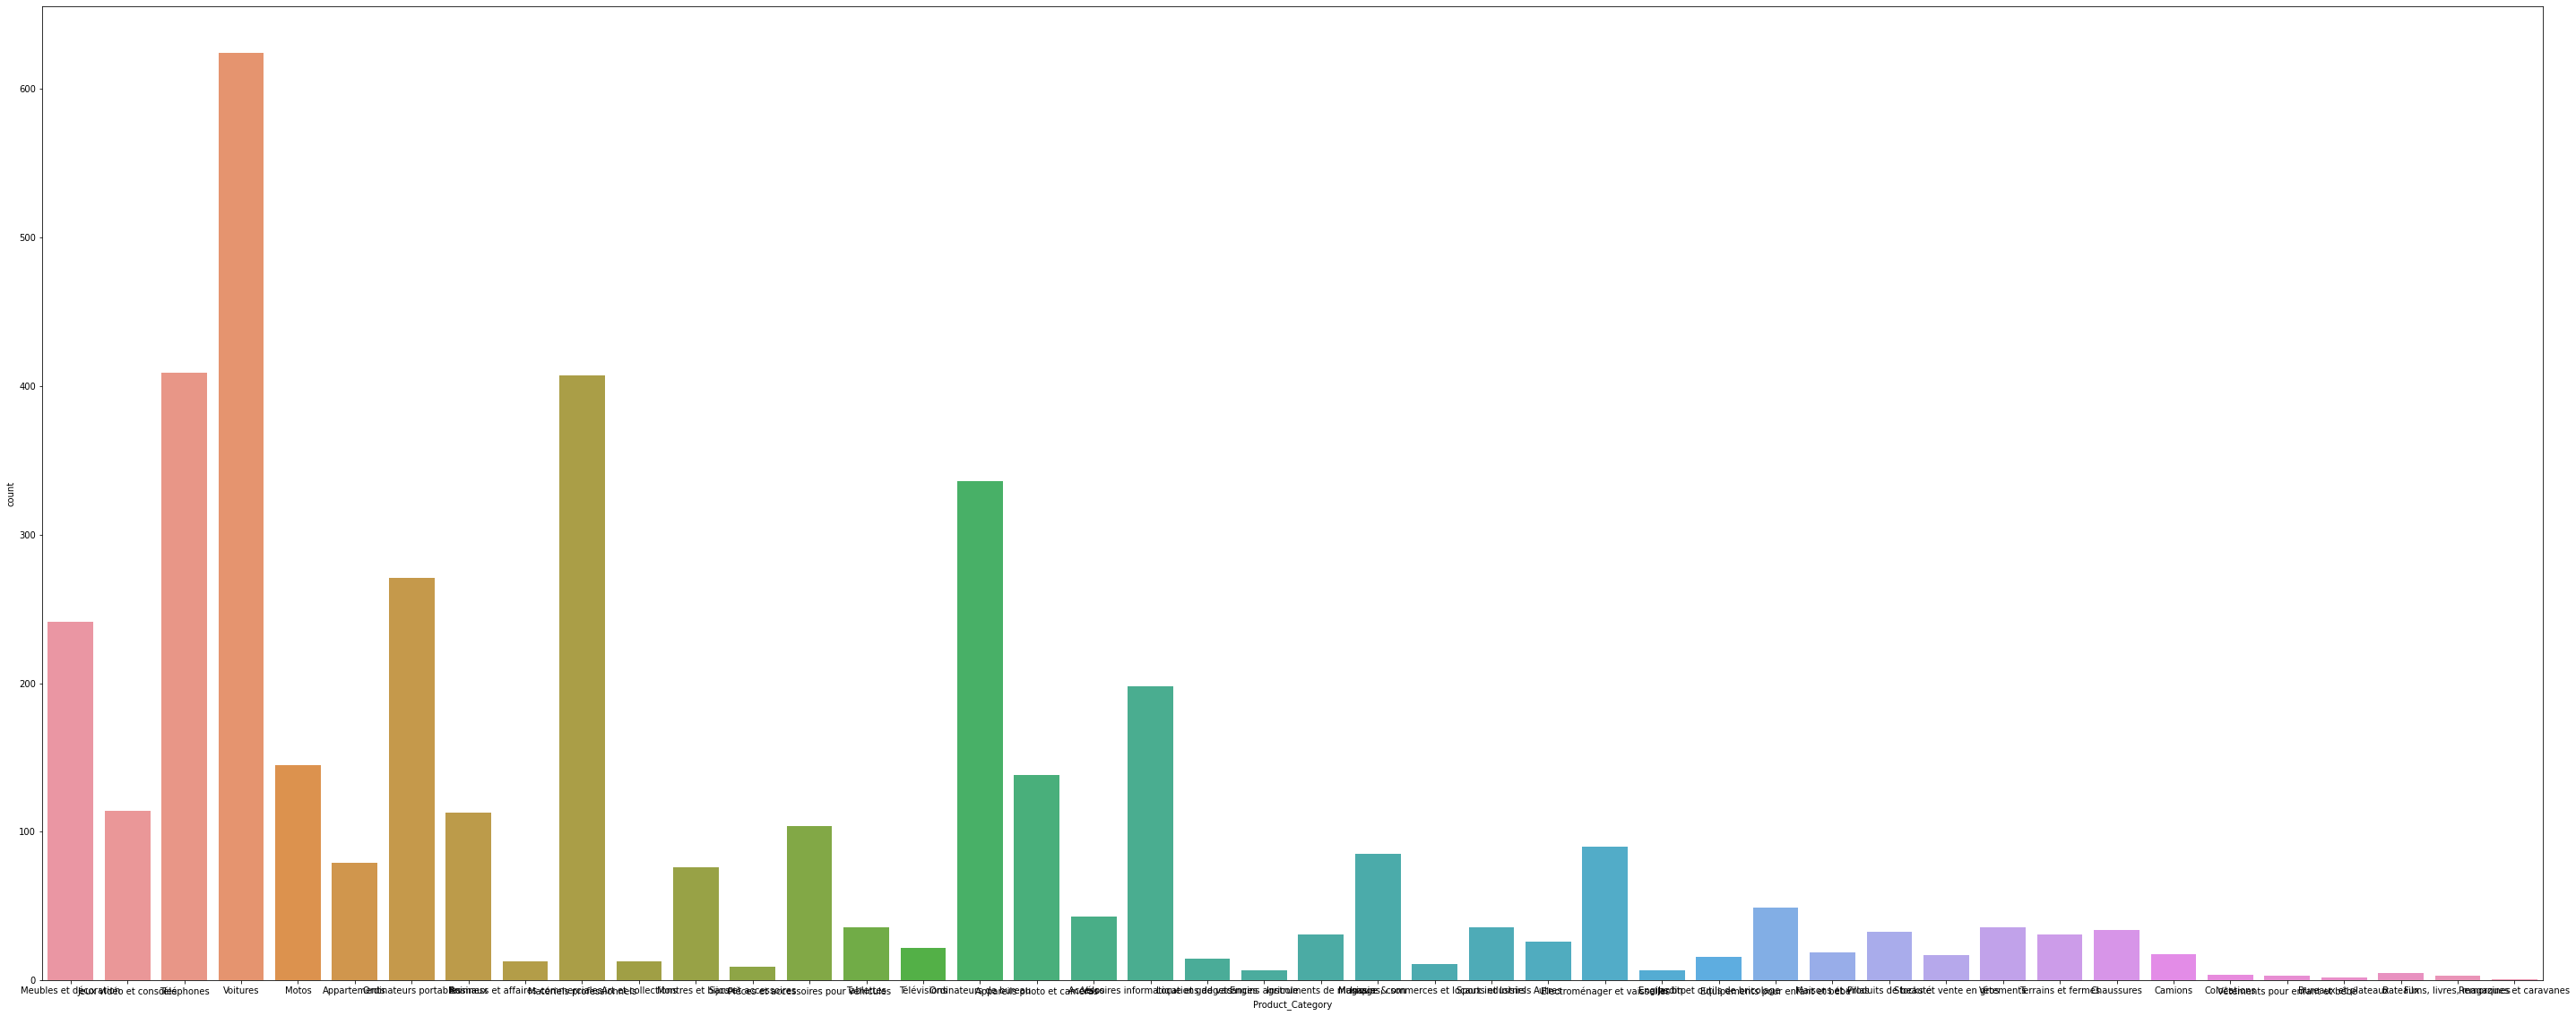

In [113]:
plt.figure(figsize=(50,20))
sbn.countplot(product_data['Product_Category'])

<AxesSubplot:xlabel='count', ylabel='Product_Category'>

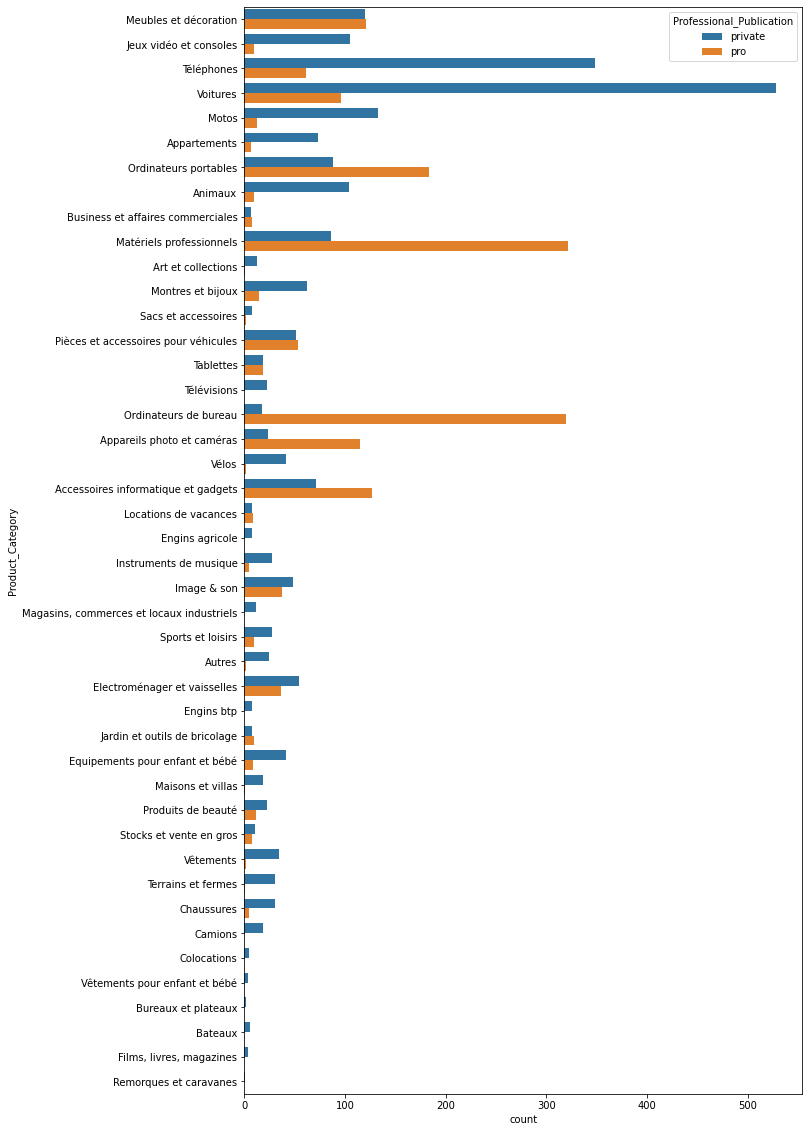

In [116]:
plt.figure(figsize=(10,20))
sbn.countplot(y=product_data['Product_Category'],hue=product_data['Professional_Publication'])

<AxesSubplot:xlabel='price', ylabel='Density'>

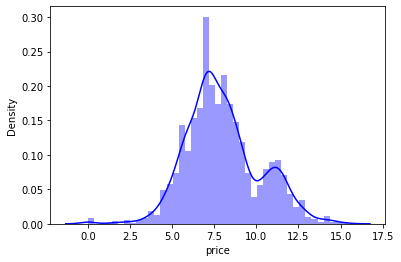

In [118]:
sbn.distplot(np.log(product_data['price']), color = 'blue')

In [120]:
train_data = product_data[product_data['price'].notna()]
train_data

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
0,chambre a coucher,40008817,Meubles et décoration,1800.0,private,Grand Casablanca,Casablanca
4,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1400.0,private,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida
5,Need For Speed Heat Xbox One Neuf,39955729,Jeux vidéo et consoles,549.0,pro,Grand Casablanca,Casablanca
7,Nikel,40008809,Voitures,75000.0,private,Gharb-Chrarda-Beni Hssen,Kénitra
8,compte free fire,40008808,Jeux vidéo et consoles,170.0,private,Grand Casablanca,Casablanca
...,...,...,...,...,...,...,...
4343,Megane 2 diesel,39234534,Voitures,63000.0,private,Gharb-Chrarda-Beni Hssen,Kénitra
4344,PC portable Asus,39234530,Ordinateurs portables,5000.0,private,Grand Casablanca,Casablanca
4345,XN-C11,39234529,Instruments de musique,90.0,private,Chaouia-Ouardigha,Khouribga
4346,Uno,39234527,Voitures,20000.0,private,Grand Casablanca,Mohammedia


In [128]:
test_data = product_data[product_data['price'].isna()]
test_data

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
1,Comte free fire,40008816,Jeux vidéo et consoles,NaN,private,Grand Casablanca,Casablanca
2,Iphone 6 plus,40008815,Téléphones,NaN,private,Grand Casablanca,Casablanca
3,Renault,40008814,Voitures,NaN,private,Chaouia-Ouardigha,Settat
6,becane,40008811,Motos,NaN,private,Fès-Boulemane,Fès
9,Appartement,40008807,Appartements,NaN,private,Grand Casablanca,Casablanca
...,...,...,...,...,...,...,...
4324,OPEL ASTRA COSMOS,39234548,Voitures,NaN,private,Gharb-Chrarda-Beni Hssen,Kénitra
4334,Iphone xs max,39234523,Téléphones,NaN,private,Grand Casablanca,Casablanca
4337,panda essence,39234560,Voitures,NaN,private,Tanger-Tétouan,Martil
4339,OPEL ASTRA COSMOS,39234548,Voitures,NaN,private,Gharb-Chrarda-Beni Hssen,Kénitra


In [129]:
len(train_data)+len(test_data) == len(product_data)

True

In [131]:
train_data.duplicated().sum()

393

In [125]:
train_data.to_csv('TrainData.csv')
test_data.to_csv('TestData.csv')